In [2]:
# Loading required packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(breakaway)
library(vegan)
#library(ggdendro)
#library(DESeq2)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4


## Importing the .biom file

In [ ]:
install.packages

In [2]:
ps = import_biom("OTU_table/ITS-OTU-table.biom",parseFunction=parse_taxonomy_greengenes)
# Import the biom table

#Despite the warning, the taxonomy does import ~correctly, except it includes empty or unassigned "Ranks"
temptax = as.matrix(tax_table(ps))
temptax = temptax[,c("Kingdom","Phylum","Class","Order","Family","Genus","Species")]
tax_table(ps)=tax_table(temptax)
# Fixing taxonomy import

sample_names(ps)=sample_data(ps)$Correct_ID
# Fixing the ID issue from the Biotech centre


ps.merged = merge_samples(ps, "Sample_ID")
# Merging the in-lab DNA extraction samples
# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.

names=colnames(sample_data(ps))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps)[ , -which(names(sample_data(ps)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

# Renaming it all
ps=ps.merged

sample_data(ps)$TotalSeqs=sample_sums(ps)
# Adding sample sums
sample_data(ps)[as.numeric(sample_data(ps)$pH)==0 & !is.na(as.numeric(sample_data(ps)$pH)),65]=NA
# Fixing pH 0's
sample_data(ps)[sample_data(ps)$Interval=="No Trees" & !is.na(sample_data(ps)$pH),23]=NA

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$ta

Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes pre

Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes pre

Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes pre

Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes pre

Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parseFunction(i$metadata$taxonomy):
“No greengenes pre

“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coerci

In [4]:
cutoff = 2000

#hist(sample_sums(ps),breaks=20)
# Blanks are very low; can be removed

ps = prune_samples(sample_sums(ps)>=cutoff, ps)
# This results in no blanks remaining.

#ps.norm = transform_sample_counts(ps, function(x) x / sum(x) )
# Transforming the sample counts to relative abundances
    
ps.norm = transform_sample_counts(ps, function(x) (x / sum(x))^0.5)
# Hellinger Transformation: "Particularly suited to species abundance data, 
    # this transformation gives low weights to variables with low counts and many zeros. 
    # The transformation itself comprises dividing each value in a data matrix by its row sum, 
    # and taking the square root of the quotient.   

ps.norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1031 taxa and 99 samples ]
sample_data() Sample Data:       [ 99 samples by 70 sample variables ]
tax_table()   Taxonomy Table:    [ 1031 taxa by 7 taxonomic ranks ]

In [21]:
df = data.frame(tax_table(ps.norm))$Kingdom
sum(is.na(df))/length(df)
# Of all OTUs...
#22% not classified to Phylum
#25% not classified to Class
#28% not classified to Order
#33% not classified to Family
#36% not classified to Genus
#58% not classified to Species
# ... honestly, not too bad.

[1] 0.2192047

## Setting up the correct sample data metadata

In [832]:
# Importing the dataset
df = read.csv("../data/Soils_data/WBNPNWT_Soils_2015_Metadata_File_ITS.txt",sep="\t",header=TRUE, row.names=3)

df=df[,2:(dim(df)[2]-2)]
# Adjust because of weird samplenames from seq centre

Factors = colnames(df)
FactorClass = c("txt","txt","txt","txt","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","txt","txt","txt","num","txt","txt","num","num","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","txt","num","num","num","num","num","num","num","num","num","num")
FactorSet = c("seq","sample","sample","sample","sample","sample","seq","seq","seq","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","class","class","class","class","class","class","class","class","class","class","class","class","sample","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","codes","codes","codes","codes","codes","codes","codes","codes","codes","codes")
FactorTable = data.frame(Factors=Factors,Class=FactorClass,Set=FactorSet)
# Creating a dataframe with all the factors and whether or not they should be numeric
# And what set of data they belong to

FactorTable = FactorTable[(FactorTable$Factors %in% colnames(sample_data(ps.norm))),]

In [833]:
for (i in colnames(sample_data(ps.norm))[colnames(sample_data(ps.norm)) %in%  FactorTable$Factors ]) {
        if(FactorTable$Class[FactorTable$Factors==i]=="num"){
            sample_data(ps.norm)[,i] = as.numeric(data.frame(sample_data(ps.norm)[,i])[,1])
        }
    }
# No real need to do this for full ps, as won't really be doing stats on raw data

### Morels?

In [52]:
Morchella = subset_taxa(ps.norm,Genus=="Morchella")
Morchella

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3 taxa and 99 samples ]
sample_data() Sample Data:       [ 99 samples by 70 sample variables ]
tax_table()   Taxonomy Table:    [ 3 taxa by 7 taxonomic ranks ]

In [53]:
otu_table(Morchella)[sample_sums(Morchella)>0]

e6d83376796ce948e6c7adbb55ec1144 491c2b41b9efa12f30226af6aa1a1f87
15S-NT-28M 0.00000000                       0.002043842                     
15S-NT-31M 0.02841362                       0.000000000                     
15S-NT-48O 0.00000000                       0.003519775                     
15S-WB-18M 0.00000000                       0.000000000                     
           686e01a8cc17428aab3524e10440a61b
15S-NT-28M 0.000000000                     
15S-NT-31M 0.000000000                     
15S-NT-48O 0.000000000                     
15S-WB-18M 0.006149848

In [54]:
sample_data(Morchella)[sample_sums(Morchella)>0][,25:30]

Land_Class Land_Class_Unburned Live_Trees Mean_Duff_Depth_cm
15S-NT-28M Upland     Upland              0           0                
15S-NT-31M Wetland    Wetland             2          10                
15S-NT-48O Wetland    Wetland             0          10                
15S-WB-18M Upland     Upland              0           0                
           Mg_mg_kg Mn_mg_kg
15S-NT-28M    0.00    0.000 
15S-NT-31M      NA       NA 
15S-NT-48O 5191.26  186.443 
15S-WB-18M    0.00    0.000

## Dendrogram

In [55]:
colnames(sample_data(ps.norm))

[1] "Al_mg_kg"            "Barcodes"            "Burn_Severity_Index"
 [4] "Burned_Unburned"     "CBI"                 "CEC_cmol_kg"        
 [7] "CFSI"                "Ca_mg_kg"            "Clay_pct"           
[10] "Community"           "Correct_ID"          "Cu_mg_kg"           
[13] "Dead_Trees"          "EC_mS_cm"            "Ecosite"            
[16] "Exch_Ca_mg_kg"       "Exch_K_mg_kg"        "Exch_Mg_mg_kg"      
[19] "Exch_Na_mg_kg"       "Fe_mg_kg"            "Fire_ID"            
[22] "Forest"              "Interval"            "K_mg_kg"            
[25] "Land_Class"          "Land_Class_Unburned" "Live_Trees"         
[28] "Mean_Duff_Depth_cm"  "Mg_mg_kg"            "Mn_mg_kg"           
[31] "Mo_mg_kg"            "Moisture"            "Moisture_Regime"    
[34] "Na_mg_kg"            "Nutrient"            "O_Depth_cm"         
[37] "Org_or_Min"          "Overstory_CBI"       "P_mg_kg"            
[40] "Pct_Exposed_Mineral" "Plains"              "RBR"                
[43] "S_mg_kg"             "Sample_ID"           "Sand_pct"           
[46] "Severity_Class"      "Silt_pct"            "Site_ID"            
[49] "TC_pct"              "TIC_ash_pct"         "TOC_HCL_cruc_pct"   
[52] "TOC_LOI_pct"         "Total_N_pct"         "Total_S_pct"        
[55] "Understory_CBI"      "Veg_Comm"            "Zn_mg_kg"           
[58] "bui"                 "dc"                  "dmc"                
[61] "ffmc"                "fwi"                 "isi"                
[64] "nTrees"              "pH"                  "prec"               
[67] "rh"                  "temp"                "ws"                 
[70] "TotalSeqs"

In [70]:
ps.dist = subset_samples(ps.norm,Veg_Comm=="Jack Pine")
dist=distance(ps.dist,method="bray")
clust.res = hclust(dist, method="single")
#  "ward", "single", "complete", "average", "mcquitty", "median" or "centroid"

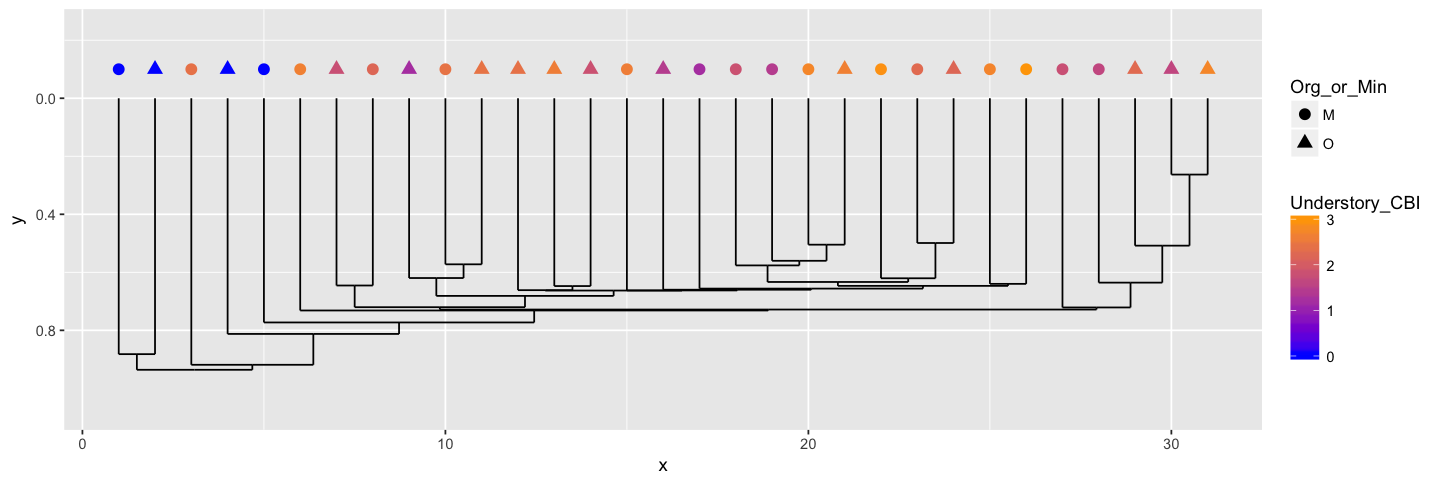

In [71]:
options(repr.plot.width=12, repr.plot.height=4)
dhc = as.dendrogram(clust.res)
# Rectangular lines
ddata = dendro_data(dhc, type = "rectangle")
ddata$properties = ddata$labels
colnames(ddata$properties) = c("x","y","Sample_ID")
ddata$properties = data.frame(join(ddata$properties,data.frame(sample_data(ps.dist)),by="Sample_ID"))
ddata2=ddata

p = ggplot(segment(ddata)) + 
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) + 
  #coord_flip() + 
  scale_y_reverse(expand = c(0.2, 0))
#p = p + geom_text(data = ddata$labels, aes(x = x, y = y, label = label), size = 3, hjust = -0.2)
#p = p + geom_point(data = ddata2$properties, aes(x = x, y = y, color=CBI), size = 3)
p = p + geom_point(data = ddata$properties, aes(x = x, y = y-0.1, color=Understory_CBI, shape=Org_or_Min), size = 3)
#p = p + geom_point(data = ddata$properties, aes(x = x, y = y, color=CFSI), size = 3)
#p = p + geom_point(data = ddata$properties, aes(x = x, y = y, color=Severity_Class), size = 3)
p = p + scale_color_gradient(low="blue",high="orange")
p 

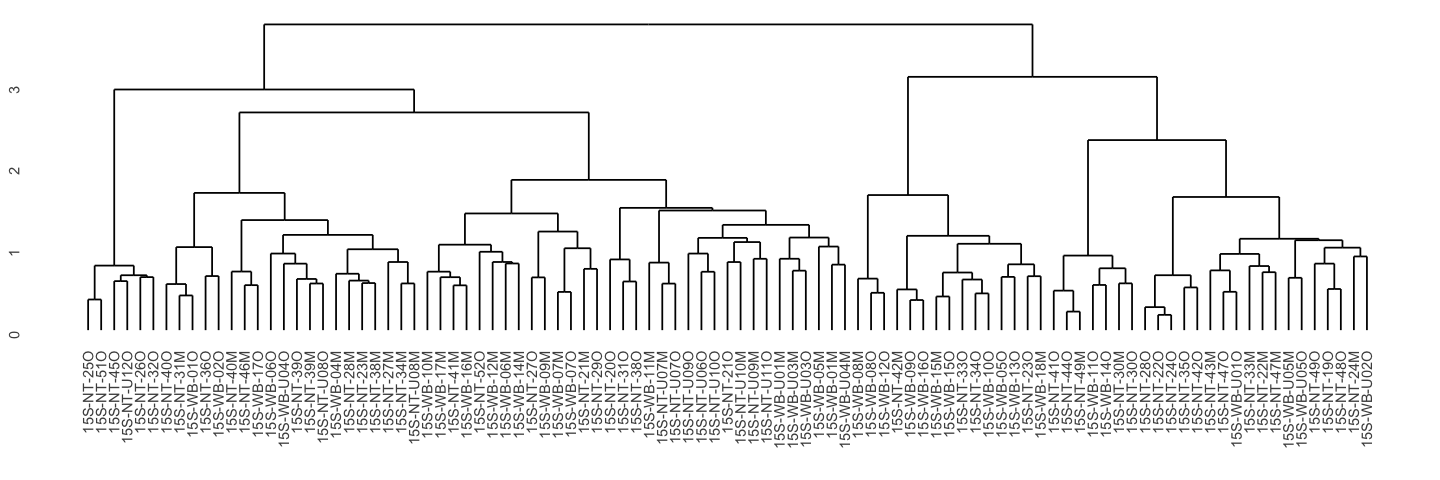

In [124]:
options(repr.plot.width=12, repr.plot.height=4)
p = ggdendrogram(clust.res, rotate = FALSE, size = 3)
p

## Ordinations

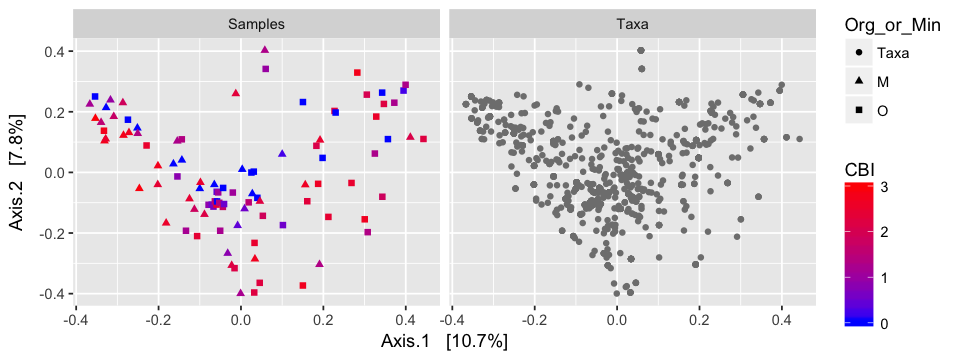

In [167]:
options(repr.plot.width=8, repr.plot.height=3)

ord.cca = ordinate(ps.norm, method = "PCoA")
p = plot_ordination(ps.norm, ord.cca, type="split", color="CBI", shape="Org_or_Min") 
p = p + scale_color_gradient(low="blue",high="red") 
p

In [1]:
options(repr.plot.width=8, repr.plot.height=4)
plot_ordination(ps.norm, ord.dca, type="split", color="CBI", shape="Org_or_Min") 

ERROR: Error in plot_ordination(ps.norm, ord.dca, type = "split", color = "CBI", : could not find function "plot_ordination"


In [454]:
ps.norm.glom = transform_sample_counts(ps.norm.glom, function(x) x / sum(x) )
ord = ordinate(ps.norm, method = "PCoA", distance = "bray", k=3, trymax=1000)

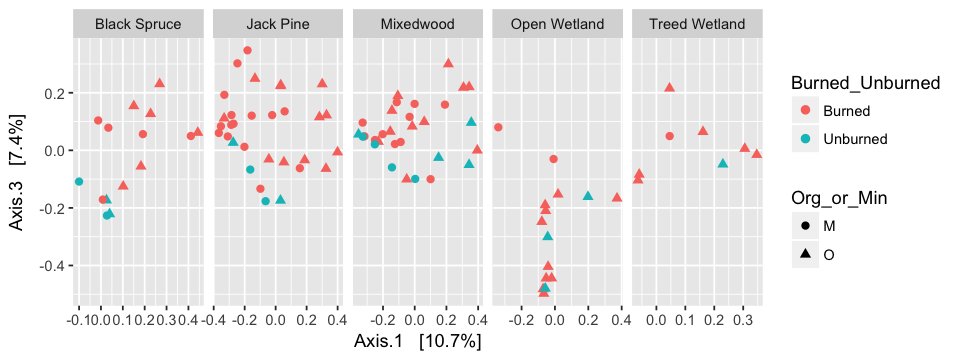

In [458]:
options(repr.plot.width=8, repr.plot.height=3)

#sample_data(ps.plot)$Org_or_Min=droplevels(sample_data(ps.plot)$Org_or_Min)
p = plot_ordination(ps.norm, ord, color = "Burned_Unburned",shape="Org_or_Min", axes=c(1,3))

p = p  + geom_point(size=2) + facet_grid(~Veg_Comm, scales="free")  #+ scale_color_gradient(low="red",high="blue") 
p

## Looking at only uplands

In [538]:
colnames(sample_data(ps))

[1] "Al_mg_kg"            "Barcodes"            "Burn_Severity_Index"
 [4] "Burned_Unburned"     "CBI"                 "CEC_cmol_kg"        
 [7] "CFSI"                "Ca_mg_kg"            "Clay_pct"           
[10] "Community"           "Correct_ID"          "Cu_mg_kg"           
[13] "Dead_Trees"          "EC_mS_cm"            "Ecosite"            
[16] "Exch_Ca_mg_kg"       "Exch_K_mg_kg"        "Exch_Mg_mg_kg"      
[19] "Exch_Na_mg_kg"       "Fe_mg_kg"            "Fire_ID"            
[22] "Forest"              "Interval"            "K_mg_kg"            
[25] "Land_Class"          "Land_Class_Unburned" "Live_Trees"         
[28] "Mean_Duff_Depth_cm"  "Mg_mg_kg"            "Mn_mg_kg"           
[31] "Mo_mg_kg"            "Moisture"            "Moisture_Regime"    
[34] "Na_mg_kg"            "Nutrient"            "O_Depth_cm"         
[37] "Org_or_Min"          "Overstory_CBI"       "P_mg_kg"            
[40] "Pct_Exposed_Mineral" "Plains"              "RBR"                
[43] "S_mg_kg"             "Sample_ID"           "Sand_pct"           
[46] "Severity_Class"      "Silt_pct"            "Site_ID"            
[49] "TC_pct"              "TIC_ash_pct"         "TOC_HCL_cruc_pct"   
[52] "TOC_LOI_pct"         "Total_N_pct"         "Total_S_pct"        
[55] "Understory_CBI"      "Veg_Comm"            "Zn_mg_kg"           
[58] "bui"                 "dc"                  "dmc"                
[61] "ffmc"                "fwi"                 "isi"                
[64] "nTrees"              "pH"                  "prec"               
[67] "rh"                  "temp"                "ws"                 
[70] "TotalSeqs"

In [841]:
ps.up = subset_samples(ps.norm)
#, Severity_Class != "Unburned", Land_Class=="Upland" & Burned_Unburned=="Burned"

ps.up

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1031 taxa and 99 samples ]
sample_data() Sample Data:       [ 99 samples by 70 sample variables ]
tax_table()   Taxonomy Table:    [ 1031 taxa by 7 taxonomic ranks ]

In [842]:
ord = ordinate(ps.up, method = "NMDS", distance = "bray", k=3, trymax=1000)
# 0.128 for Hellinger; Similar for no Hellinger.

Run 0 stress 0.1645157 
Run 1 stress 0.166674 
Run 2 stress 0.1659182 
Run 3 stress 0.1633879 
... New best solution
... Procrustes: rmse 0.02158846  max resid 0.1269084 
Run 4 stress 0.167212 
Run 5 stress 0.1634137 
... Procrustes: rmse 0.009812993  max resid 0.06778973 
Run 6 stress 0.1667986 
Run 7 stress 0.1642298 
Run 8 stress 0.1634941 
... Procrustes: rmse 0.01502862  max resid 0.08382821 
Run 9 stress 0.163373 
... New best solution
... Procrustes: rmse 0.001539414  max resid 0.008999568 
... Similar to previous best
Run 10 stress 0.1645154 
Run 11 stress 0.1664456 
Run 12 stress 0.1649707 
Run 13 stress 0.164538 
Run 14 stress 0.1639387 
Run 15 stress 0.1641652 
Run 16 stress 0.1642526 
Run 17 stress 0.1633916 
... Procrustes: rmse 0.00786993  max resid 0.04937094 
Run 18 stress 0.1660461 
Run 19 stress 0.1653987 
Run 20 stress 0.1642843 
*** Solution reached


In [843]:
#ord = ordinate(ps.norm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=1000)
NMDS.coords = data.frame(ord$points)
# Extracting the coordinates from the ordination
NMDS.coords = merge(NMDS.coords,sample_data(ps.norm), by = 0)
# Merging it with the sample data, by rowname (the same)
NMDS.coords = NMDS.coords #%>%
    #filter(Land_Class=="Upland" | Land_Class=="Unburned")#%>%
    #filter(Org_or_Min=="O")
plot_ly(NMDS.coords, x = NMDS.coords$MDS1, y = NMDS.coords$MDS2, z = NMDS.coords$MDS3, color = ~NMDS.coords$Interval
        , symbol = NMDS.coords$Org_or_Min, symbols = c(1,3,5)
       )%>%
    layout(scene = list(xaxis = list(title = "NMDS1"), yaxis = list(title = "NMDS2"),
          zaxis = list(title = "NMDS3")))

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter3d
No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode


HTML widgets cannot be represented in plain text (need html)

In [608]:
Sys.setenv("plotly_username"="TheaWhitman")
Sys.setenv("plotly_api_key"="dJ71gYtACcvUICDcTpb6")
plotly_POST(x = last_plot(), filename = "WB2015-ITS.3D", fileopt = "overwrite", sharing = "public")

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter3d
No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode
No encoding supplied: defaulting to UTF-8.
Success! Modified your plotly here -> https://plot.ly/~TheaWhitman/5


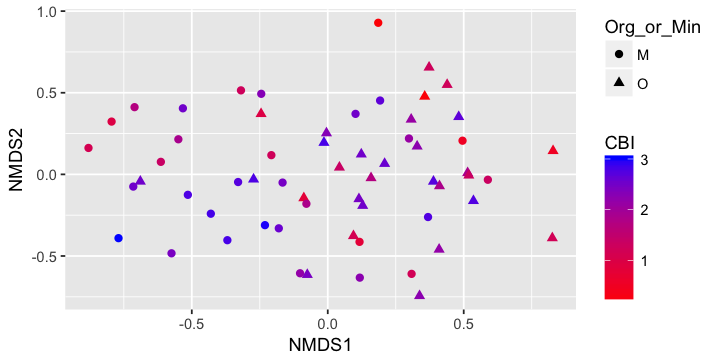

In [799]:
options(repr.plot.width=6, repr.plot.height=3)

p = plot_ordination(ps.up, ord
                    ,color = "CBI", shape="Org_or_Min"
                    ,axes=c(1,2)
                   )

p = p  + geom_point(size=2)  #+ facet_grid(~Land_Class~Burned_Unburned, scales="free") 
p = p + scale_color_gradient(low="red",high="blue")
p

## Checking lab reps

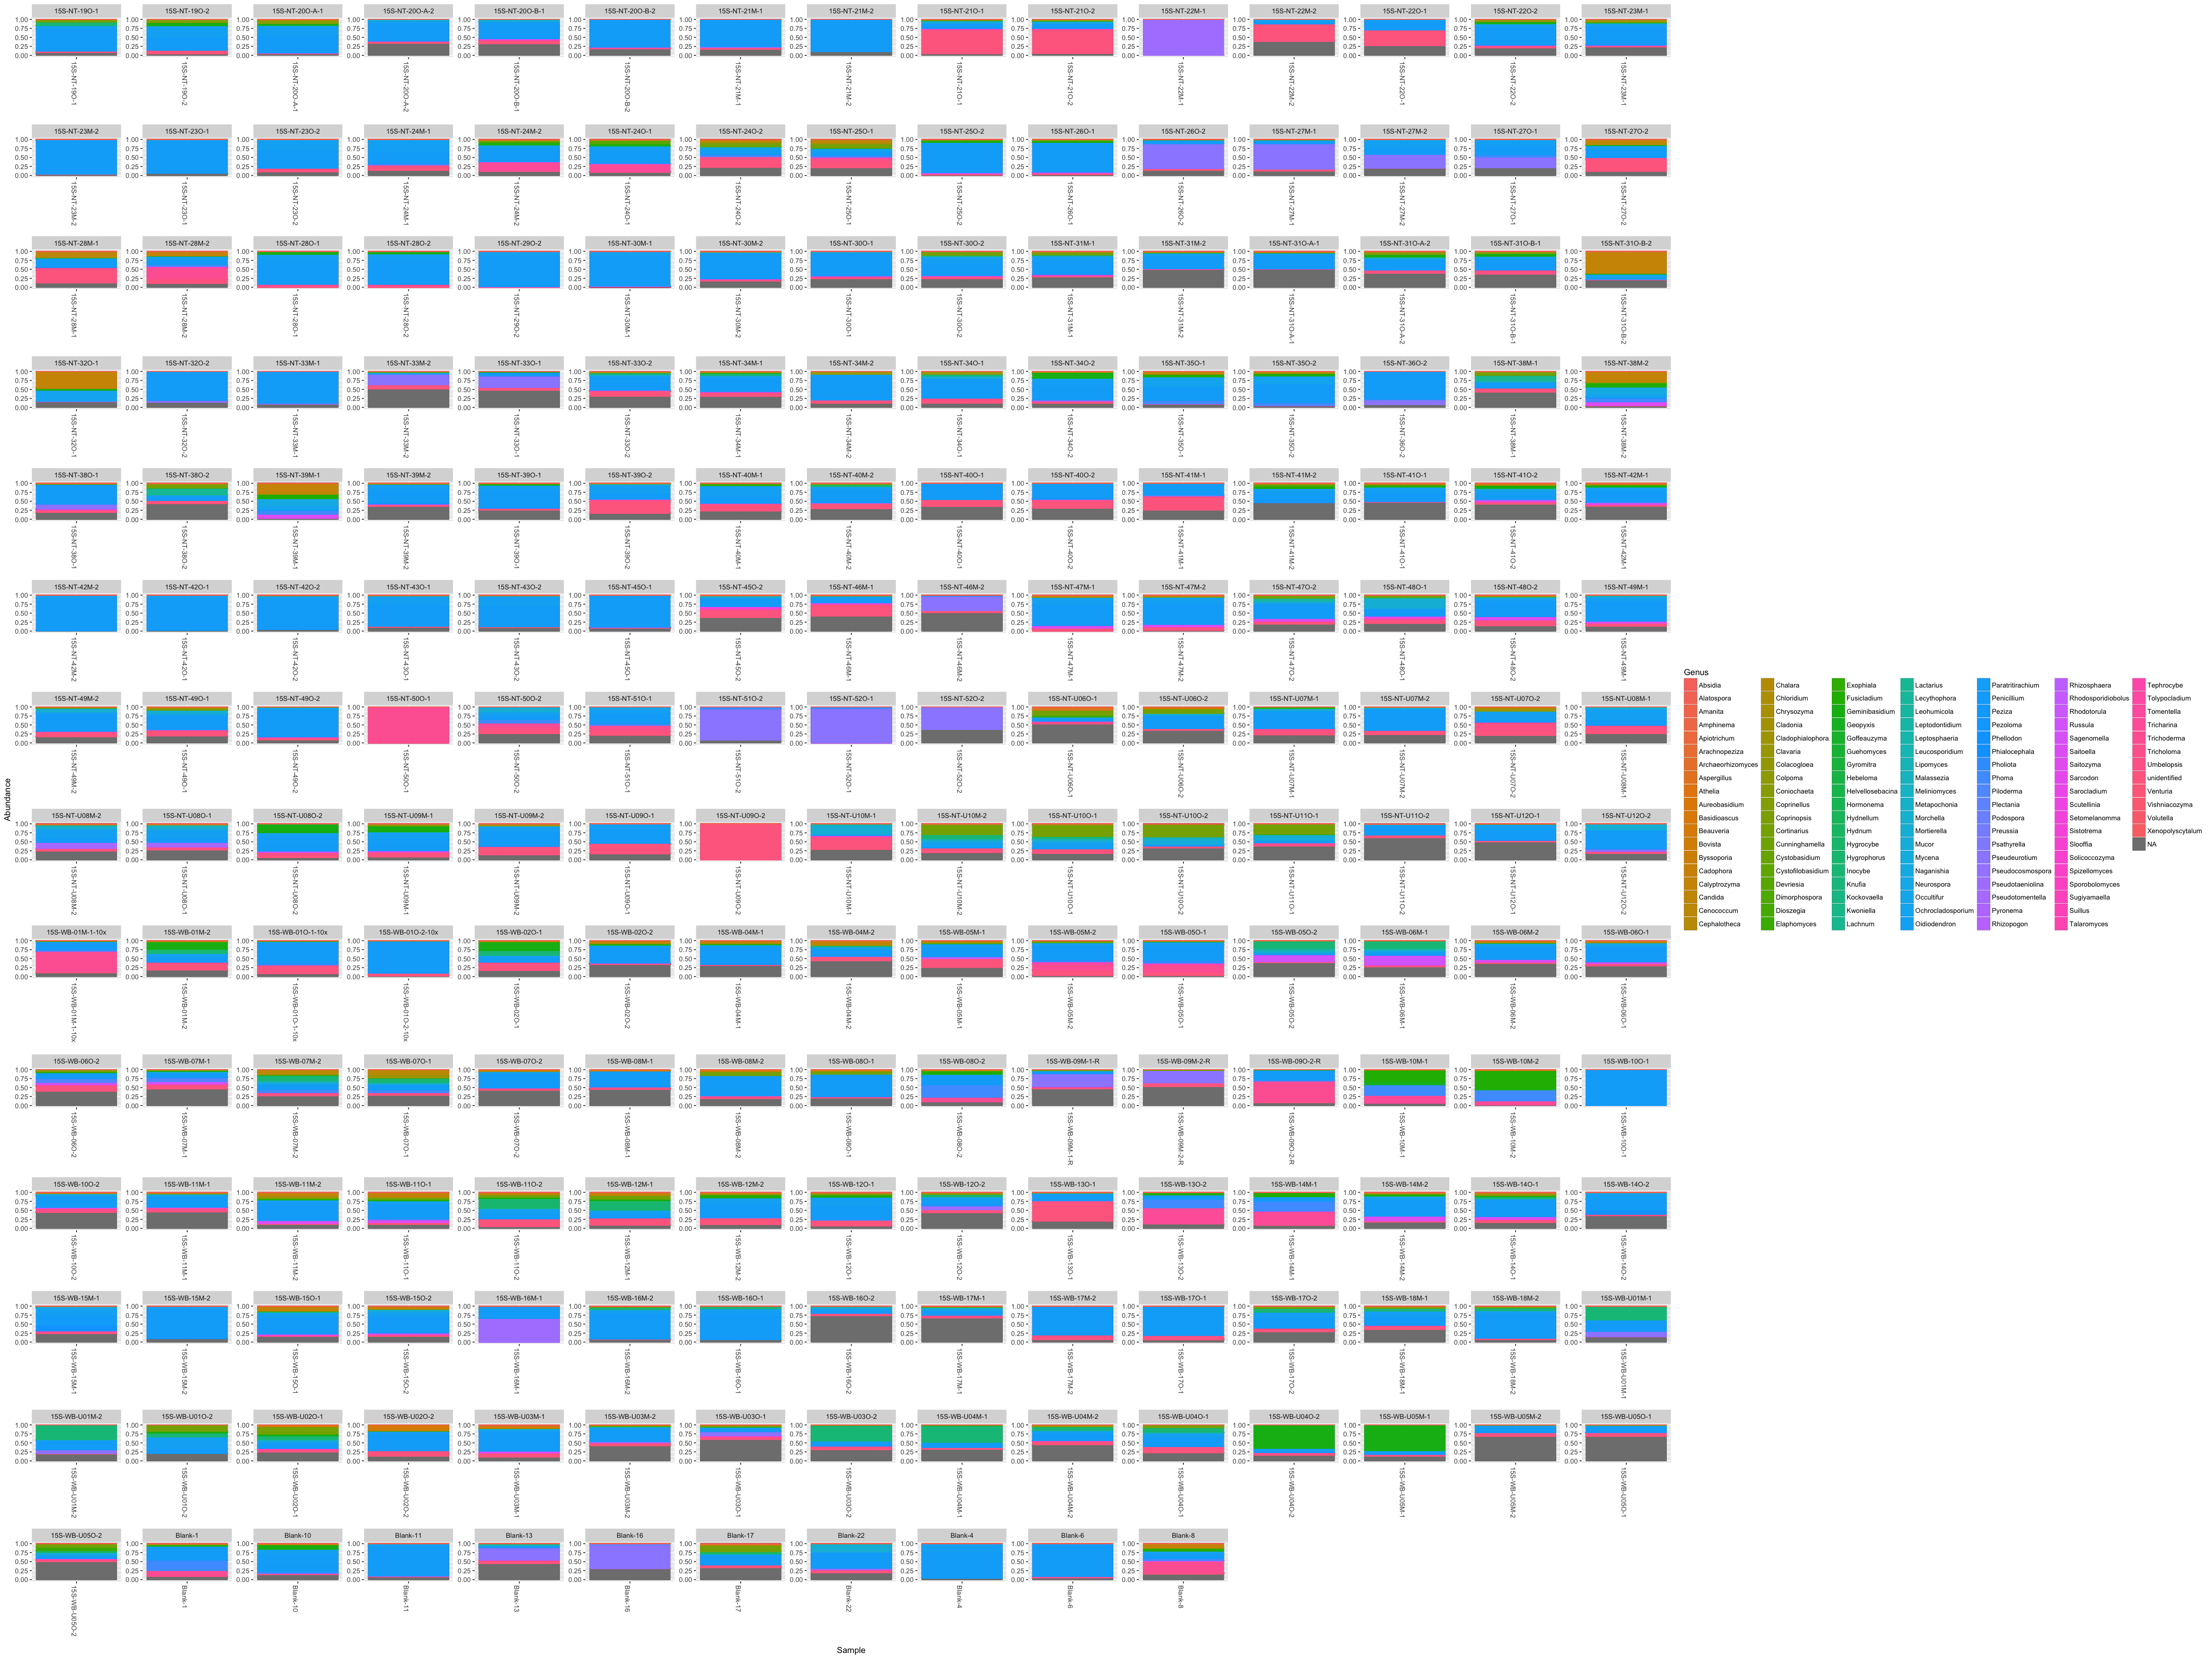

In [115]:
options(repr.plot.width=40, repr.plot.height=30)
#plot_bar(ps, fill="Phylum")
p = plot_bar(ps.norm, fill="Genus") + facet_wrap(~Sample_ID, scales="free") + geom_bar(aes(color=Genus, fill=Genus), stat="identity", position="stack")
p
# This looks good, actually. The lab-DNA extraction reps match up well. So, we could merge these samples for most analyses.

## Checking Org vs Min same site

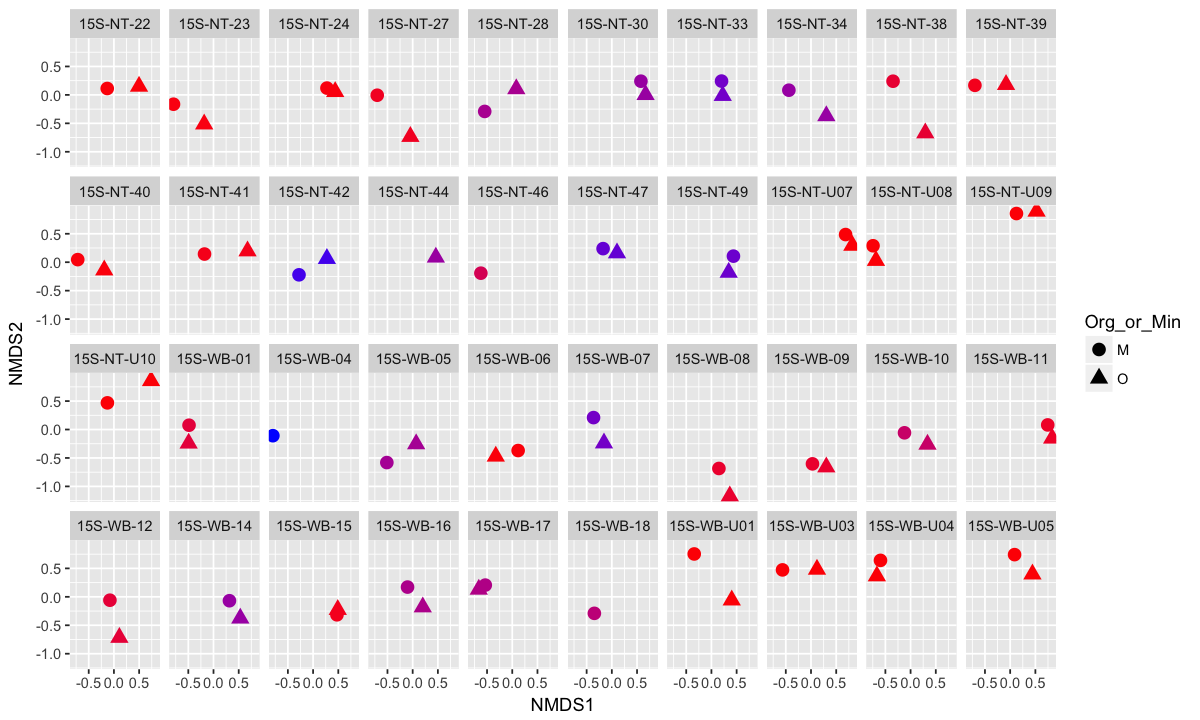

In [221]:
options(repr.plot.width=10, repr.plot.height=6)
p = plot_ordination(ps.norm, ord, color = "CFSI", shape="Org_or_Min")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + facet_wrap(~Site_ID, ncol=10) + scale_color_gradient(low="red",high="blue") + guides(color=FALSE)
p

# Do seem somewhat related, but certainly distinct.

## Checking barcode bias

In [119]:
mdf = psmelt(ps)

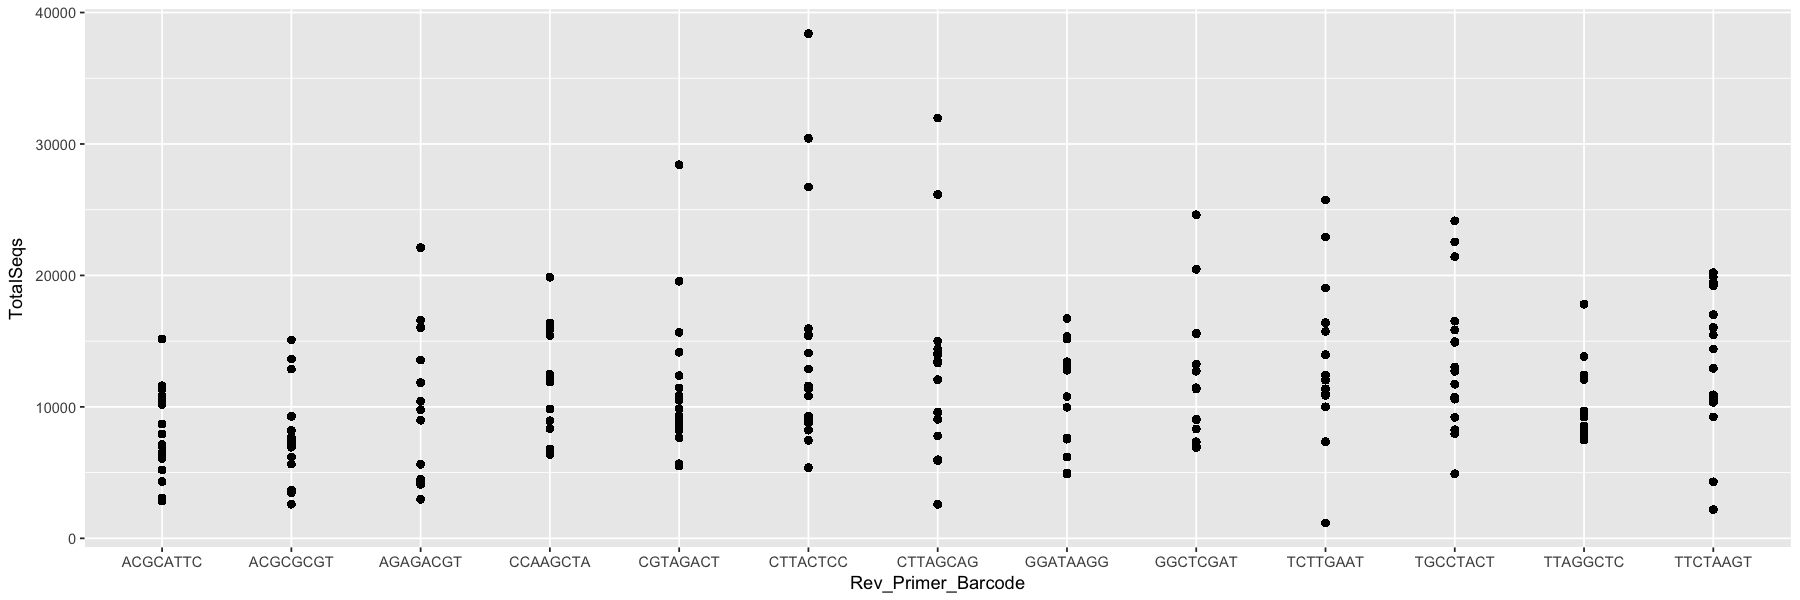

In [121]:
options(repr.plot.width=15, repr.plot.height=5)
p = ggplot(mdf,aes(x=Rev_Primer_Barcode, y=TotalSeqs))
p = p + geom_point()
p
# No clear evidence of bias against one barcode

## Relative abundances

In [391]:
length(levels(factor(tax_table(ps.norm)[, "Genus"])))

[1] 126

In [418]:
ps.norm.glom = tax_glom(ps.norm, taxrank=rank_names(ps.norm)[5], NArm=TRUE, bad_empty=c(NA, "", " ", "\t"))

In [417]:

# Create a factor corresponding to the Genera
genfac = factor(tax_table(ps.norm.glom)[, "Family"])

# Tabulate the counts for each genera in each sample
gentab = apply(otu_table(ps.norm.glom), MARGIN = 1, function(x) {tapply(x, INDEX = genfac, FUN = sum, na.rm = TRUE, simplify = TRUE)})

observationThreshold = 0
GenSum = apply(gentab > observationThreshold, 2, sum)
OTUSum = GenSum = apply(otu_table(ps.norm.glom) > observationThreshold, 1, sum)
GenSum
# The number of OTUs or genera in each sample

15S-NT-19O  15S-NT-20O  15S-NT-21M  15S-NT-21O  15S-NT-22M  15S-NT-22O 
         17           4          17           5          16           4 
 15S-NT-23M  15S-NT-23O  15S-NT-24M  15S-NT-24O  15S-NT-25O  15S-NT-26O 
          8          15          25          15           9           6 
 15S-NT-27M  15S-NT-27O  15S-NT-28M  15S-NT-28O  15S-NT-29O  15S-NT-30M 
         20          15          11           6          14          15 
 15S-NT-30O  15S-NT-31M  15S-NT-31O  15S-NT-32O  15S-NT-33M  15S-NT-33O 
         15          11           8          11          30          18 
 15S-NT-34M  15S-NT-34O  15S-NT-35O  15S-NT-36O  15S-NT-38M  15S-NT-38O 
         15          12          14          17          13          12 
 15S-NT-39M  15S-NT-39O  15S-NT-40M  15S-NT-40O  15S-NT-41M  15S-NT-41O 
         14          13          12          14          22           2 
 15S-NT-42M  15S-NT-42O  15S-NT-43M  15S-NT-44O  15S-NT-45O  15S-NT-46M 
          9           5          13           5          17          12 
 15S-NT-47M  15S-NT-47O  15S-NT-48O  15S-NT-49M  15S-NT-49O  15S-NT-51O 
         16          22          22          15          11           2 
 15S-NT-52O 15S-NT-U06O 15S-NT-U07M 15S-NT-U07O 15S-NT-U08M 15S-NT-U08O 
          6          15          23          23          17          13 
15S-NT-U09M 15S-NT-U09O 15S-NT-U10M 15S-NT-U10O 15S-NT-U11O 15S-NT-U12O 
         21          15          13           9          12          14 
 15S-WB-01M  15S-WB-01O  15S-WB-02O  15S-WB-04M  15S-WB-05M  15S-WB-05O 
         16          17          24          14          17          13 
 15S-WB-06M  15S-WB-06O  15S-WB-07M  15S-WB-07O  15S-WB-08M  15S-WB-08O 
         13          19          14          12          14           5 
 15S-WB-09M  15S-WB-09O  15S-WB-10M  15S-WB-10O  15S-WB-11M  15S-WB-11O 
         17          14          18          14          19          12 
 15S-WB-12M  15S-WB-12O  15S-WB-13O  15S-WB-14M  15S-WB-14O  15S-WB-15M 
         17          11          19          13           4          19 
 15S-WB-15O  15S-WB-16M  15S-WB-16O  15S-WB-17M  15S-WB-17O  15S-WB-18M 
          8          16           4          12          10          14 
15S-WB-U01M 15S-WB-U01O 15S-WB-U02O 15S-WB-U03M 15S-WB-U03O 15S-WB-U04M 
         10          22          30          16          19           9 
15S-WB-U04O 15S-WB-U05M 15S-WB-U05O 
         11          13          10

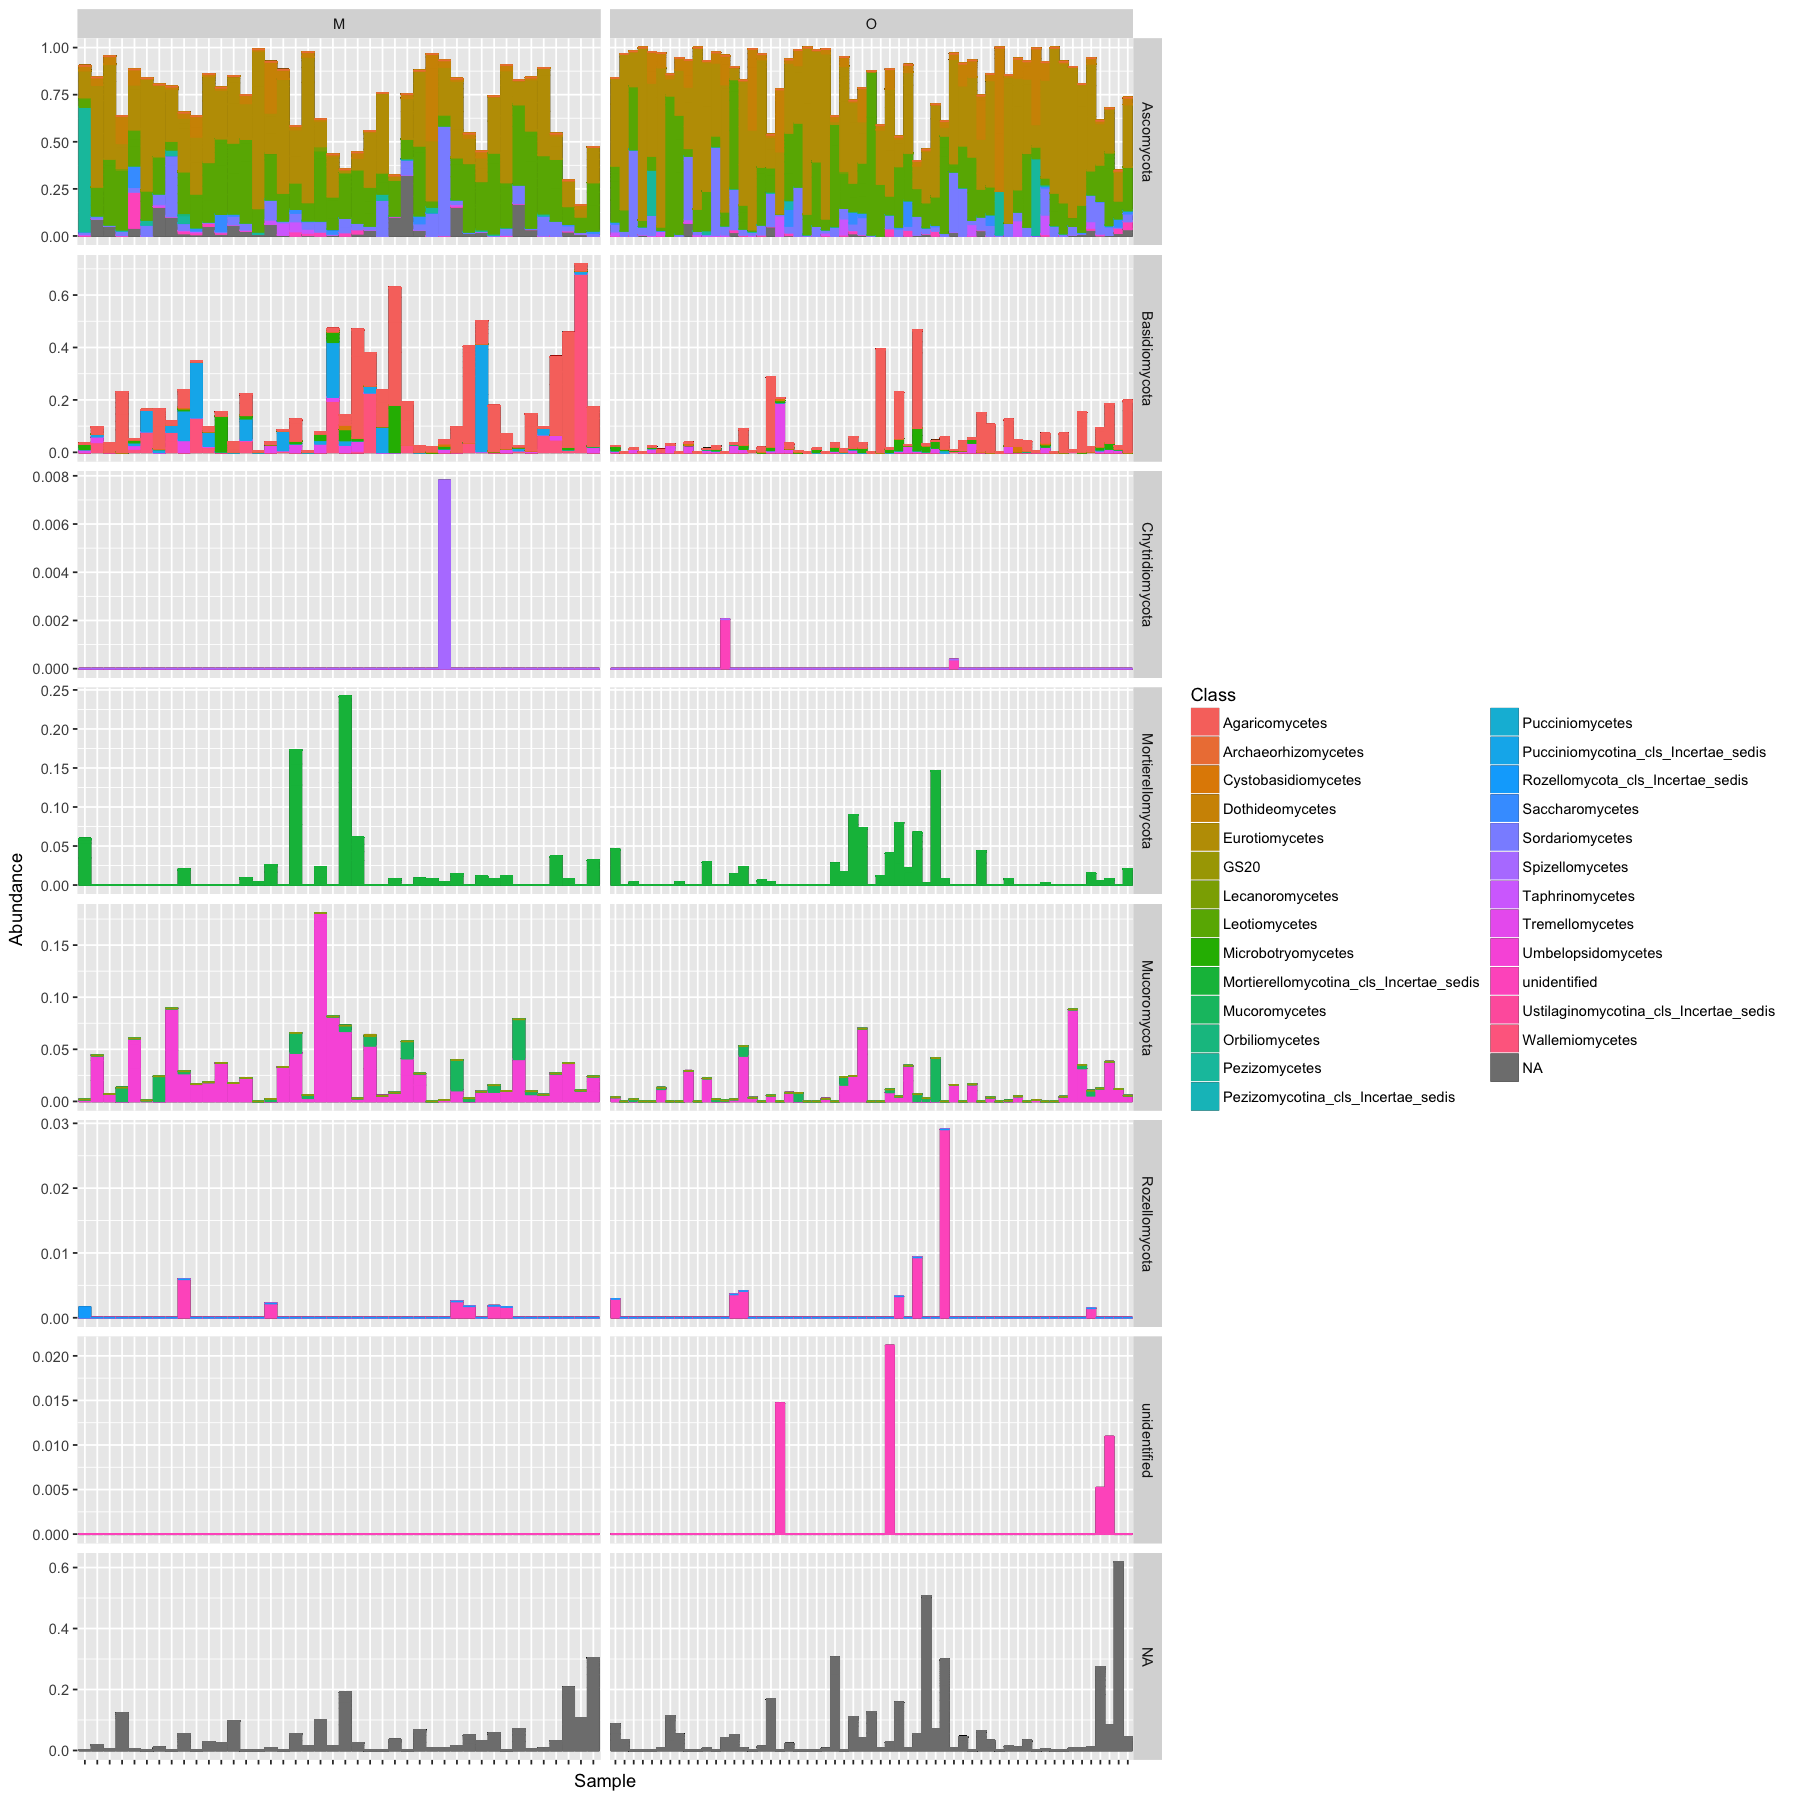

In [370]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_bar(ps.norm, fill="Class") + geom_bar(aes(color=Class, fill=Class), stat="identity", position="stack") + theme(axis.text.x=element_blank()) + facet_grid(~Phylum~Org_or_Min,scales="free")
p 

In [223]:
mdf = psmelt(ps.norm)

In [224]:
df = mdf %>%
    group_by(Sample,Genus)%>%
    mutate(Relabund=sum(Abundance))

cutoff=0.005

CommonPhyla = df %>%
    group_by(Genus)%>%
    summarize(MeanRelabund=mean(Relabund), MaxRelabund = max(Relabund))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)

print(c(paste(dim(CommonPhyla)[1],"most abundant genera")))

CommonPhyla = as.matrix(CommonPhyla)[,1]

df = df %>%
    filter(Genus %in% CommonPhyla)%>%
    filter(Org_or_Min != "B")

[1] "104 most abundant genera"


In [316]:
df = mdf %>%
    group_by(Sample,Genus)%>%
    mutate(Relabund=sum(Abundance))

cutoff=0.05

CommonTax = df %>%
    group_by(Genus)%>%
    summarize(MeanRelabund=mean(Relabund), MaxRelabund = max(Relabund))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)

print(c(paste(dim(CommonTax)[1],"most abundant taxa")))

CommonTax = as.matrix(CommonTax)[,1]

df = df %>%
    group_by(Sample)%>%
    filter(Genus %in% CommonTax)

[1] "38 most abundant taxa"


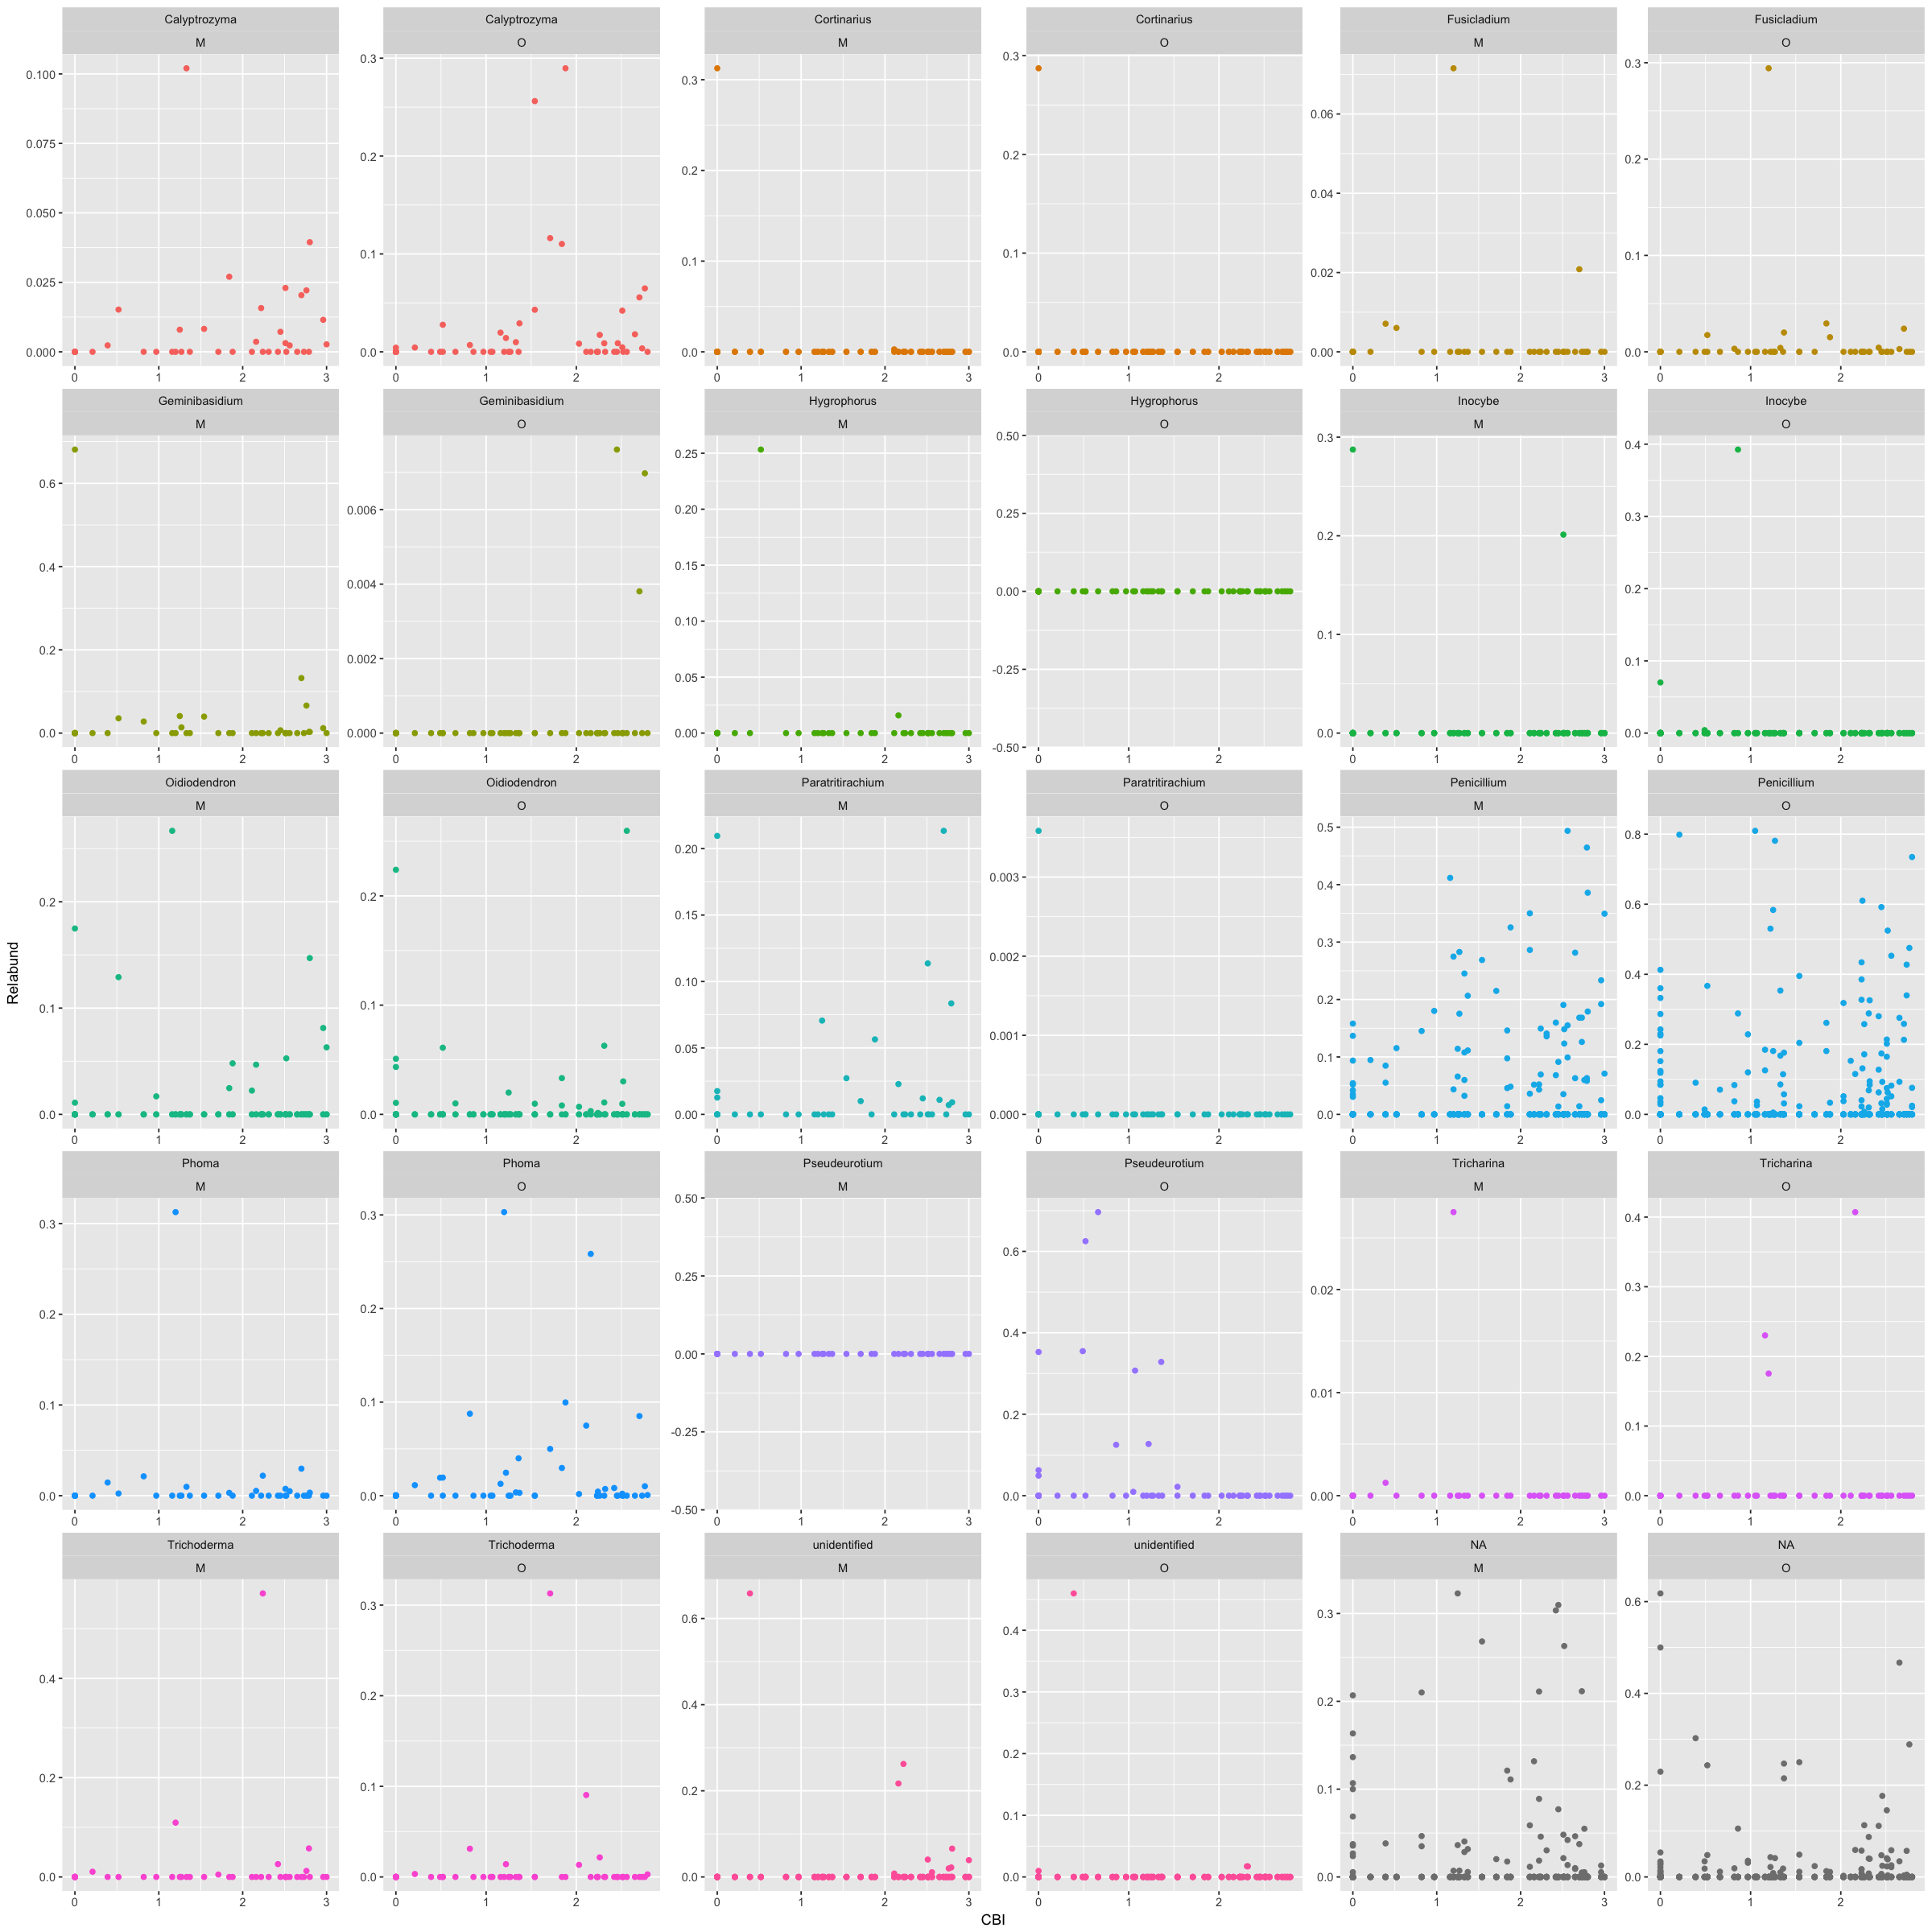

In [282]:
options(repr.plot.width=20, repr.plot.height=20)
p = ggplot(df)
p = p + geom_point(aes(x=CBI, y=Relabund, color=Genus)) + facet_wrap(~Genus+Org_or_Min, scales="free")
p = p + guides(color=FALSE)
p

In [361]:
d.Pen=df[df$Genus=="Penicillium",]

In [362]:
d.Pen=d.Pen[!is.na(d.Pen$OTU),]

In [363]:
dim(d.Pen)

[1] 2772   83

In [364]:
cutoff=0.3

CommonTax = d.Pen %>%
    group_by(OTU)%>%
    summarize(MeanRelabund=mean(Abundance), MaxRelabund = max(Abundance))%>%
    filter(MeanRelabund>cutoff | MaxRelabund>cutoff)


print(c(paste(dim(CommonTax)[1],"most abundant taxa")))

CommonTax = as.matrix(CommonTax)[,1]

d.Pen = d.Pen %>%
    filter(OTU %in% CommonTax)

dim(d.Pen)

[1] "8 most abundant taxa"


[1] 792  83

In [365]:
levels(as.factor(d.Pen$OTU))

[1] "122586d6844f67237ea5cf8da21d9962" "6d4eca68762c9055c0f01926c6c6603d"
[3] "7e98c055240959ee9ae58d8b56faba92" "89cd99e609a39f0c7f5113bde099d133"
[5] "95c2bc67eacd85bbca54967d19d7a339" "a0299a0a79e59eede92dd2280c3c7e82"
[7] "c295356000b4a266483dc6d03c656913" "f3d55a0d0216af104ad69f7824874e4c"

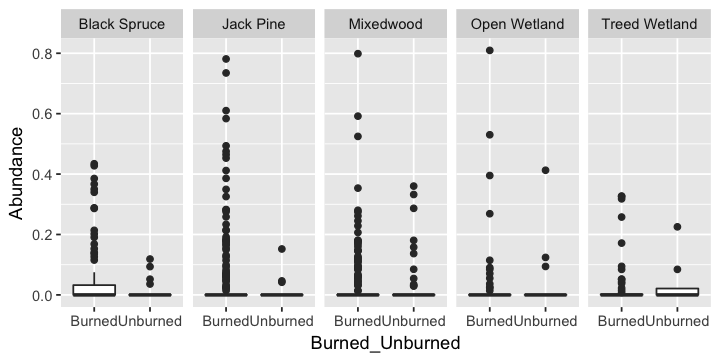

In [377]:
options(repr.plot.width=6, repr.plot.height=3)

p = ggplot(d.Pen)
#p = p + geom_point(aes(x=Understory_CBI, y=Abundance, color=OTU)) + facet_grid(~OTU~Veg_Comm)
p = p + geom_boxplot(aes(x=Burned_Unburned, y=Abundance)) + facet_grid(~Veg_Comm,scales="free")
#p = p + geom_boxplot(aes(x=Burned_Unburned, y=Abundance, color=OTU)) + facet_wrap(~Veg_Comm,scales="free")
p = p + guides(color=FALSE)
p

## Rarefaction curves

In [187]:
calculate_rarefaction_curves <- function(psdata, measures, depths) {
  require('plyr') # ldply
  require('reshape2') # melt

  estimate_rarified_richness <- function(psdata, measures, depth) {
    if(max(sample_sums(psdata)) < depth) return()
    psdata <- prune_samples(sample_sums(psdata) >= depth, psdata)

    rarified_psdata <- rarefy_even_depth(psdata, depth, verbose = FALSE)

    alpha_diversity <- estimate_richness(rarified_psdata, measures = measures)

    # as.matrix forces the use of melt.array, which includes the Sample names (rownames)
    molten_alpha_diversity <- melt(as.matrix(alpha_diversity), varnames = c('Sample', 'Measure'), value.name = 'Alpha_diversity')

    molten_alpha_diversity
  }

  names(depths) <- depths # this enables automatic addition of the Depth to the output by ldply
  rarefaction_curve_data <- ldply(depths, estimate_rarified_richness, psdata = psdata, measures = measures, .id = 'Depth', .progress = ifelse(interactive(), 'text', 'none'))

  # convert Depth from factor to numeric
  rarefaction_curve_data$Depth <- as.numeric(levels(rarefaction_curve_data$Depth))[rarefaction_curve_data$Depth]

  rarefaction_curve_data
}

In [188]:
rarefaction_curve_data = calculate_rarefaction_curves(ps, c('Observed'), rep(c(1, 100, 500, 1000, 2000, 5000, 10000, 20000), each = 10))
summary(rarefaction_curve_data)

Warning message in estimate_richness(rarified_psdata, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”Warning message in estimate_richness(rarified_psdata, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”Warning message in estimate_richness(rarified_psdata, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-ab

     Depth                 Sample          Measure          value      
 Min.   :    1   X15S.NT.28M.1:   80   Observed:12990   Min.   : 1.00  
 1st Qu.:  100   X15S.NT.28O.2:   80                    1st Qu.: 8.00  
 Median : 1000   X15S.NT.30O.1:   80                    Median :16.00  
 Mean   : 2321   X15S.NT.30O.2:   80                    Mean   :16.02  
 3rd Qu.: 2000   X15S.NT.41O.1:   80                    3rd Qu.:23.00  
 Max.   :20000   X15S.NT.45O.2:   80                    Max.   :49.00  
                 (Other)      :12510                                   

In [189]:
rarefaction_curve_data_summary = ddply(rarefaction_curve_data, c('Depth', 'Sample', 'Measure'), summarise, alpha_diversity_mean = mean(value), alpha_diversity_sd = sd(value))

In [190]:
sample_names(ps) = paste("X",sample_names(ps) ,sep="")
sample_names(ps) = gsub("-",".", sample_names(ps))

In [191]:
rarefaction_curve_data_summary_verbose = merge(rarefaction_curve_data_summary, data.frame(sample_data(ps)), by.x = 'Sample', by.y = 'row.names')

In [192]:
rarefaction_curve_data_summary_verbose$Overstory_CBI = as.numeric(rarefaction_curve_data_summary_verbose$Overstory_CBI)
rarefaction_curve_data_summary_verbose$CFSI = as.numeric(rarefaction_curve_data_summary_verbose$CFSI)
rarefaction_curve_data_summary_verbose$pH = as.numeric(rarefaction_curve_data_summary_verbose$pH)

In [196]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(
  data = rarefaction_curve_data_summary_verbose,
  mapping = aes(
    x = Depth,
    y = alpha_diversity_mean,
    ymin = alpha_diversity_mean - alpha_diversity_sd,
    ymax = alpha_diversity_mean + alpha_diversity_sd,
    colour = Understory_CBI,
    group = Sample
  )
) + geom_line(
#) + scale_colour_manual(values=c("black","darkred")
) + scale_colour_gradient(low="black",high="red"
) + geom_pointrange(size=0.1
) + facet_wrap(facets = ~ Veg_Comm) + scale_x_continuous(limits = c(0, 20000))

## OTU abundance

In [134]:
hist(log(taxa_sums(ps.norm)), breaks=20)

In [153]:
plot(sort(taxa_sums(ps.norm)))

In [186]:
AbundOTUs = row.names(data.frame(sort(taxa_sums(ps.norm))[932:1031]))

In [214]:
mdf=melt(otu_table(ps.norm))
mdf = mdf %>%
    filter(X2 %in% AbundOTUs)%>%
    group_by(X2)%>%
    arrange(-value)
colnames(mdf)=c("Sample_ID","OTU","Abundance")

In [215]:
head(mdf)

Sample_ID   OTU                              Abundance
1 15S-NT-20O  122586d6844f67237ea5cf8da21d9962 0.8094929
2 15S-NT-24O  7e98c055240959ee9ae58d8b56faba92 0.7986247
3 15S-NT-22O  7e98c055240959ee9ae58d8b56faba92 0.7811416
4 15S-NT-28O  7e98c055240959ee9ae58d8b56faba92 0.7347914
5 15S-NT-25O  8835787979cd972b2850fe2ea71cbb10 0.6963854
6 15S-WB-U04M 27d65c36331f1008c621555a5b1f1194 0.6809662

In [216]:
colnames(data.frame(sample_data(ps.norm)))

[1] "Al_mg_kg"            "Barcodes"            "Burn_Severity_Index"
 [4] "Burned_Unburned"     "CBI"                 "CEC_cmol_kg"        
 [7] "CFSI"                "Ca_mg_kg"            "Clay_pct"           
[10] "Community"           "Correct_ID"          "Cu_mg_kg"           
[13] "Dead_Trees"          "EC_mS_cm"            "Ecosite"            
[16] "Exch_Ca_mg_kg"       "Exch_K_mg_kg"        "Exch_Mg_mg_kg"      
[19] "Exch_Na_mg_kg"       "Fe_mg_kg"            "Fire_ID"            
[22] "Forest"              "Interval"            "K_mg_kg"            
[25] "Land_Class"          "Land_Class_Unburned" "Live_Trees"         
[28] "Mean_Duff_Depth_cm"  "Mg_mg_kg"            "Mn_mg_kg"           
[31] "Mo_mg_kg"            "Moisture"            "Moisture_Regime"    
[34] "Na_mg_kg"            "Nutrient"            "O_Depth_cm"         
[37] "Org_or_Min"          "Overstory_CBI"       "P_mg_kg"            
[40] "Pct_Exposed_Mineral" "Plains"              "RBR"                
[43] "S_mg_kg"             "Sample_ID"           "Sand_pct"           
[46] "Severity_Class"      "Silt_pct"            "Site_ID"            
[49] "TC_pct"              "TIC_ash_pct"         "TOC_HCL_cruc_pct"   
[52] "TOC_LOI_pct"         "Total_N_pct"         "Total_S_pct"        
[55] "Understory_CBI"      "Veg_Comm"            "Zn_mg_kg"           
[58] "bui"                 "dc"                  "dmc"                
[61] "ffmc"                "fwi"                 "isi"                
[64] "nTrees"              "pH"                  "prec"               
[67] "rh"                  "temp"                "ws"                 
[70] "Total_C_pct"         "TotalSeqs"

In [217]:
mdf2=join(mdf,data.frame(sample_data(ps.norm)),by="Sample_ID")
head(mdf2)

Sample_ID   OTU                              Abundance Al_mg_kg 
1 15S-NT-20O  122586d6844f67237ea5cf8da21d9962 0.8094929 #N/A     
2 15S-NT-24O  7e98c055240959ee9ae58d8b56faba92 0.7986247 2967.1300
3 15S-NT-22O  7e98c055240959ee9ae58d8b56faba92 0.7811416 833.9400 
4 15S-NT-28O  7e98c055240959ee9ae58d8b56faba92 0.7347914 3650.9700
5 15S-NT-25O  8835787979cd972b2850fe2ea71cbb10 0.6963854 362.4630 
6 15S-WB-U04M 27d65c36331f1008c621555a5b1f1194 0.6809662 0.0000   
  Barcodes         Burn_Severity_Index Burned_Unburned CBI  CEC_cmol_kg
1 CGCTATTAAGAGACGT 2.3750              Burned          1.05 #N/A       
2 TGGAATGCGGCTCGAT 2.1175              Burned          0.21 0.0000     
3 GGATAAGAACGCATTC 3.5300              Burned          1.27 0.0000     
4 CGTTGAAGCCAAGCTA 4.2750              Burned          2.79 0.0000     
5 ACTGCGCGTTCTAAGT 2.2075              Burned          0.66 0.0000     
6 GTTGCCAATCTTGAAT 1.0000              Unburned        0.00 12.4400    
  CFSI       ⋯ fwi      isi         nTrees pH   prec        rh         
1 1.00000000 ⋯ 34.47629 9.549219773 8        NA 0.0000345   33.72715235
2 0.13500000 ⋯ 27.64367 9.821613693 32     6.75 0.000074    34.71994772
3 0.03888889 ⋯ 42.48677 13.06413211 32     6.27 0.000138998 35.30829619
4 3.64500000 ⋯ 42.69650 13.12996742 32     7.46 0.000140967 35.54851196
5 0.00000000 ⋯ 19.77714 7.051965333 9      6.48 0.000469702 35.47506669
6 0.00000000 ⋯  0.00000 0           32     6.98 0           0          
  temp        ws          Total_C_pct TotalSeqs
1 28.36350358 11.95882987     NA      10439    
2 19.13665006 17.89801163 16.100      13246    
3 24.90084595 17.10254234 12.900      10865    
4 24.90136299 17.25127309 31.900      15926    
5 27.6250193  7.7702025   46.000      10918    
6 0           0            0.944      10005

In [222]:
options(repr.plot.width=12, repr.plot.height=12)
p = ggplot(mdf2,aes(x=Burned_Unburned, y=Abundance))
p = p + geom_boxplot()
p = p + facet_wrap(~OTU, scales="free")
p

## Stats

In [835]:
cutoff = 0.0
ps.norm.subset=subset_taxa(ps.norm, taxa_sums(ps.norm)>cutoff)

In [836]:
ps.norm.subset

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1029 taxa and 99 samples ]
sample_data() Sample Data:       [ 99 samples by 70 sample variables ]
tax_table()   Taxonomy Table:    [ 1029 taxa by 7 taxonomic ranks ]

Df Sum Sq     Mean Sq     F value  Pr(>F)   
Groups     4 0.01770402 0.004426006 1.167916 0.3300094
Residuals 94 0.35622826 0.003789662       NA        NA

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                   diff         lwr        upr     p adj
Jack Pine-Black Spruce      0.004433319 -0.04942116 0.05828780 0.9993800
Mixedwood-Black Spruce      0.020815443 -0.03333094 0.07496182 0.8217664
Open Wetland-Black Spruce   0.029447351 -0.03307550 0.09197021 0.6856976
Treed Wetland-Black Spruce -0.017645522 -0.09260779 0.05731675 0.9653510
Mixedwood-Jack Pine         0.016382124 -0.02747023 0.06023447 0.8365413
Open Wetland-Jack Pine      0.025014032 -0.02884045 0.07886852 0.6968154
Treed Wetland-Jack Pine    -0.022078841 -0.08997980 0.04582212 0.8945371
Open Wetland-Mixedwood      0.008631908 -0.04551447 0.06277829 0.9918648
Treed Wetland-Mixedwood    -0.038460965 -0.10659367 0.02967174 0.5201391
Treed Wetland-Open Wetland -0.047092873 -0.12205514 0.02786940 0.4104635


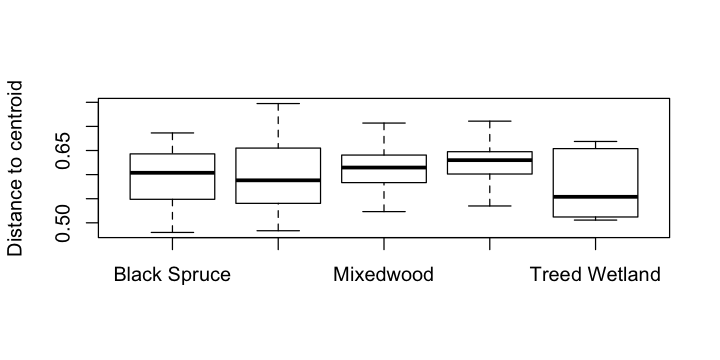

In [837]:
df = as(sample_data(ps.norm.subset), "data.frame")
d = distance(ps.norm.subset, method = "bray")
sampdat = sample_data(ps.norm.subset)
groups = as.factor(sampdat$Veg_Comm)
x = betadisper(d, groups)
boxplot(x, ylab = "Distance to centroid")
anova(x)
TukeyHSD(x, ordered = FALSE, conf.level = 0.95)
# Performing test of beta dispersion - the permanova/adonis test requires that groups have similar dispersion.
# This doesn't look outrageously bad here for Org_or_Min, Veg_Comm, Land_Class, Burned_Unburned

In [850]:
AdonisFunction = function(physeq=ps.norm, method="bray", Org_or_Min=c("O","M"), Land_Class=c("Upland","Wetland"),
                          Burned_Unburned=c("Burned","Unburned")){
    physeq = prune_samples(sample_data(physeq)$Burned_Unburned %in% Burned_Unburned, physeq)
    physeq = prune_samples(sample_data(physeq)$Org_or_Min %in% Org_or_Min, physeq)
    physeq = prune_samples(sample_data(physeq)$Land_Class %in% Land_Class, physeq)
    physeq = prune_samples(!is.na(sample_data(physeq)$pH), physeq)
    physeq = prune_samples(!is.na(sample_data(physeq)$CFSI), physeq)
    physeq = prune_samples(!is.na(sample_data(physeq)$TOC_LOI_pct), physeq)    
    d = distance(physeq, method = method, weighted=TRUE)  
    d.adonis = adonis(d ~ 
                      + sample_data(physeq)$Veg_Comm  
                      + sample_data(physeq)$Org_or_Min 
                      #+ sample_data(physeq)$Land_Class
                      #+ sample_data(physeq)$Sand_pct 
                      + sample_data(physeq)$pH
                      #+ sample_data(physeq)$Total_S_pct
                      #+ sample_data(physeq)$Al_mg_kg
                      #+ sample_data(physeq)$Exch_Ca_mg_kg
                      #+ sample_data(physeq)$Fire_ID
                      #+ sample_data(physeq)$CEC_cmol_kg
                      #+ sample_data(physeq)$TOC_LOI_pct
                      #+ sample_data(physeq)$ffmc
                      #+ sample_data(physeq)$Pct_Exposed_Mineral
                      #+ sample_data(physeq)$P_mg_kg
                      #+ sample_data(physeq)$Total_N_pct
                      #+ sample_data(physeq)$Interval
                      #+ sample_data(physeq)$CFSI
                      #+ sample_data(physeq)$CBI
                      #+ sample_data(physeq)$Understory_CBI
                      #+ sample_data(physeq)$fwi
                      + sample_data(physeq)$Burn_Severity_Index
                      #+ sample_data(physeq)$RBR
                      #+ sample_data(physeq)$Burned_Unburned
                      * sample_data(physeq)$Veg_Comm 
                      + sample_data(physeq)$Veg_Comm * sample_data(physeq)$pH
                      , df)
    d.adonis
}
# Try removing unburned sites from these models|

In [851]:
AdonisFunction(physeq=ps.norm.subset, Org_or_Min=c("O","M"), Land_Class=c("Upland","Wetland"), Burned_Unburned="Burned")
# adonis(formula = d ~ +sample_data(physeq)$Org_or_Min + sample_data(physeq)$Land_Class *      sample_data(physeq)$pH + sample_data(physeq)$Veg_Comm * sample_data(physeq)$pH +      sample_data(physeq)$Veg_Comm * sample_data(physeq)$CBI, data = df)


Call:
adonis(formula = d ~ +sample_data(physeq)$Veg_Comm + sample_data(physeq)$Org_or_Min +      sample_data(physeq)$pH + sample_data(physeq)$Burn_Severity_Index *      sample_data(physeq)$Veg_Comm + sample_data(physeq)$Veg_Comm *      sample_data(physeq)$pH, data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                                                                     Df
sample_data(physeq)$Veg_Comm                                          4
sample_data(physeq)$Org_or_Min                                        1
sample_data(physeq)$pH                                                1
sample_data(physeq)$Burn_Severity_Index                               1
sample_data(physeq)$Veg_Comm:sample_data(physeq)$Burn_Severity_Index  4
sample_data(physeq)$Veg_Comm:sample_data(physeq)$pH                   4
Residuals                                                            58
Total                                                        

## Holden plots

In [470]:
d = psmelt(ps.norm)

In [492]:
df = d %>%
    group_by(Land_Class,Org_or_Min,Family,CBI,RBR,Burn_Severity_Index,OTU)%>%
    summarize(TaxPresent = ifelse(sum(Abundance)>0,1,0))%>%
    filter(TaxPresent>0)%>%
    group_by(Land_Class,Org_or_Min,Family)%>%
    summarize(MeanCBI=mean(CBI),MeanRBR=mean(RBR),MeanBSI=mean(Burn_Severity_Index),n=n())

In [493]:
df = d %>%
    group_by(Land_Class,Org_or_Min,Family,OTU,CBI,RBR,Burn_Severity_Index)%>%
    summarize(TaxPresent = ifelse(sum(Abundance)>0,1,0))%>%
    filter(TaxPresent>0)%>%
    group_by(Land_Class,Org_or_Min,Family,OTU)%>%
    summarize(MeanCBI=mean(CBI),MeanRBR=mean(RBR),MeanBSI=mean(Burn_Severity_Index))%>%
    group_by(Land_Class,Org_or_Min,Family)%>%
    mutate(nTax = n())

In [494]:
head(df)

Land_Class Org_or_Min Family                 OTU                             
1 Upland     M          Archaeorhizomycetaceae 60e314d4d981d7e7198e13395d3183ab
2 Upland     M          Atheliaceae            0525cf6d73a806583b59615e2721d588
3 Upland     M          Atheliaceae            0d449ed9b2f8434303709005c047c45d
4 Upland     M          Atheliaceae            766b14826f5f4952eb1c6cd279e7a1a5
5 Upland     M          Atheliaceae            bfd9f716a1ab7afcfcd4268338cfe072
6 Upland     M          Atheliaceae            c22ccd28280fa394e9b290dd5d774e8c
  MeanCBI MeanRBR  MeanBSI  nTax
1 1.840   368.4856 2.786806 1   
2 1.370   173.1690 3.512500 6   
3 1.265   161.1744 3.690024 6   
4 0.820   273.9831 3.205682 6   
5 1.160   149.1797 3.867548 6   
6 1.250   262.8684 3.150000 6

In [495]:
Order = df %>%
    group_by(Family)%>%
    summarize(Order=mean(MeanRBR))%>%
    arrange(-Order)

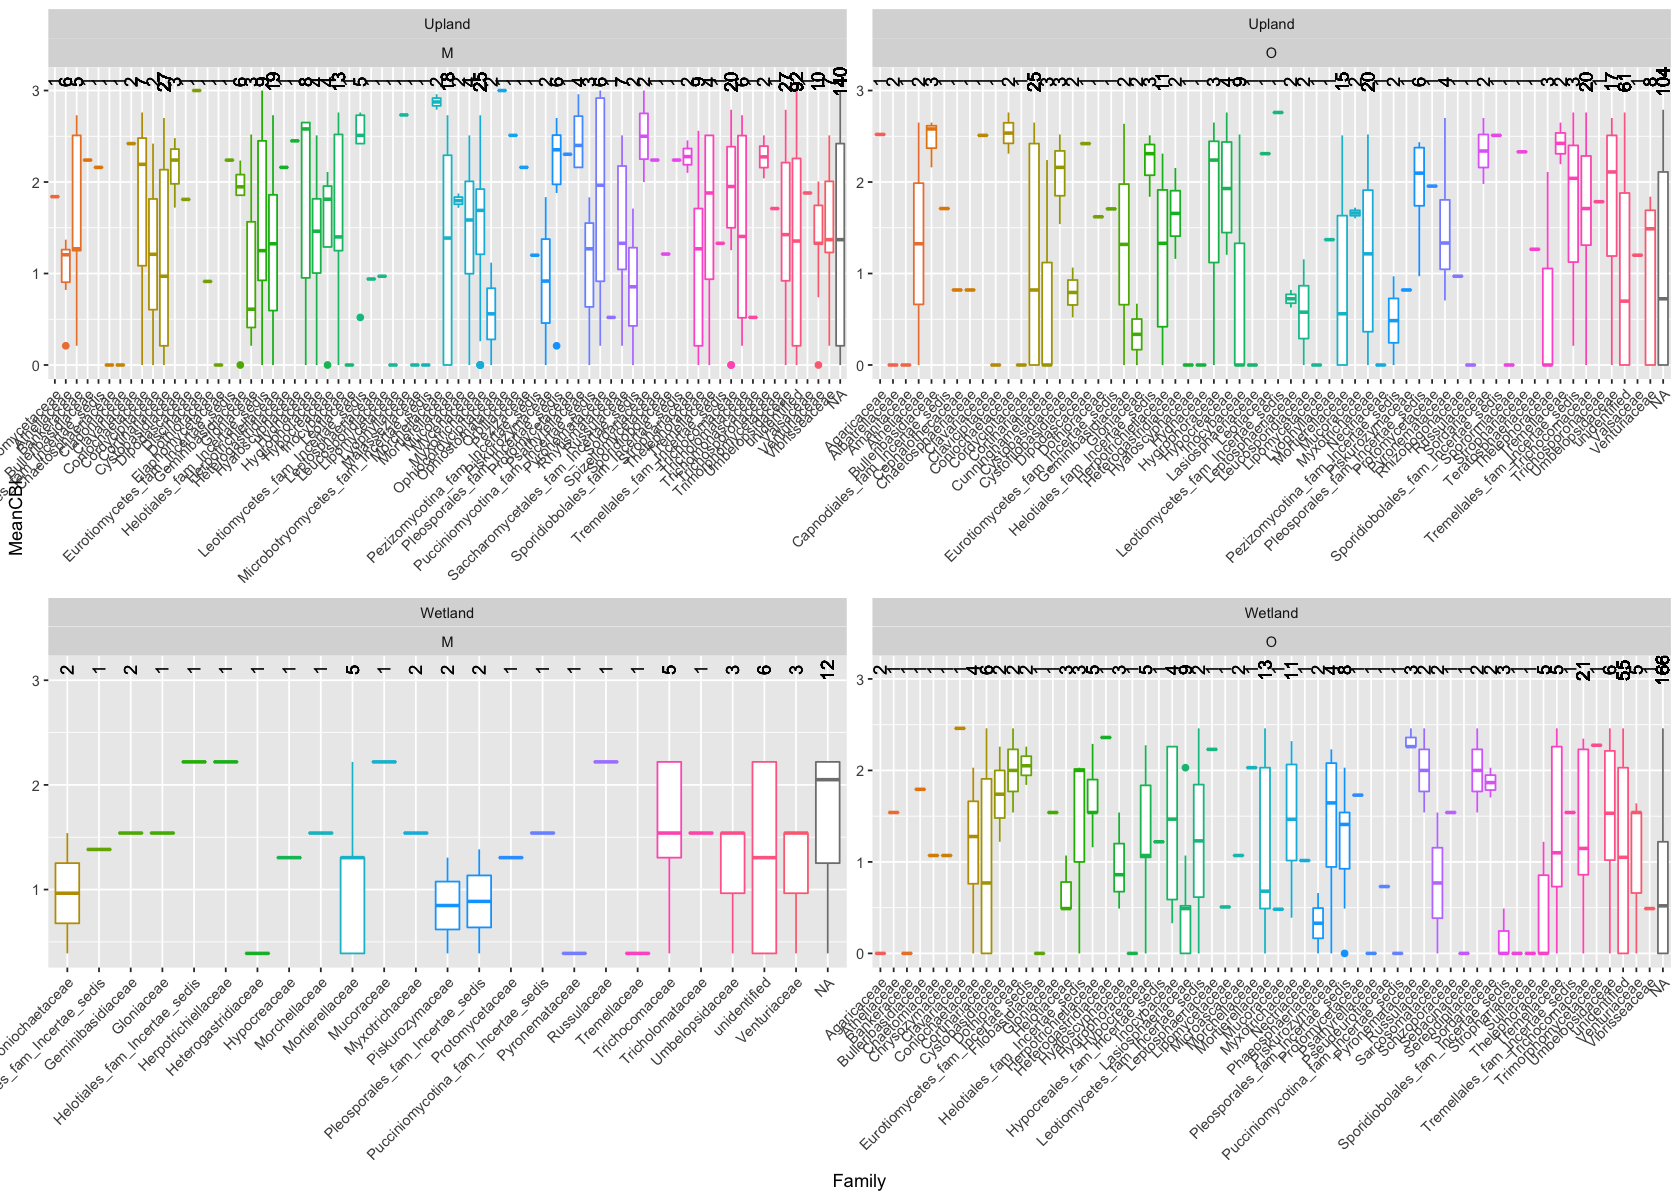

In [497]:
options(repr.plot.width=14, repr.plot.height=10)

df$Class = ordered(df$Family, levels=paste(Order$Family))

p = ggplot(df, aes(x=Family, colour=Family)) + geom_boxplot(aes(y=MeanCBI)) 
p = p + facet_wrap(~Land_Class*Org_or_Min, scales="free")
p = p + theme(axis.text.x = element_text(angle=45,hjust=1))
p = p + guides(colour=FALSE)
p = p + geom_text(aes(label=paste("",nTax, sep=""), y = 3.1, angle=90), colour="black")
p = p + theme()
p
# Need to think about exactly what we want to calculate here...

## Question: Are sites within the same severity class more similar?

In [514]:
dist=phyloseq::distance(ps.norm,method="bray",type="samples")
head(dist)

[1] 1.0000000 0.9061927 0.9832417 0.7114590 0.6706266 0.9792644

In [530]:
dist=data.frame(as.matrix(dist))
dist.melt=data.frame( t(combn(names(dist),2)), dist=t(dist)[lower.tri(dist)] )
head(dist.melt)

X1          X2          dist     
1 X15S.NT.19O X15S.NT.20O 1.0000000
2 X15S.NT.19O X15S.NT.21M 0.9061927
3 X15S.NT.19O X15S.NT.21O 0.9832417
4 X15S.NT.19O X15S.NT.22M 0.7114590
5 X15S.NT.19O X15S.NT.22O 0.6706266
6 X15S.NT.19O X15S.NT.23M 0.9792644

In [539]:
df = read.csv("../data/Soils_data/WBNPNWT_Soils_2015_Metadata_File_ITS.txt",sep="\t",header=TRUE, row.names=3)
df[df$Sample == "15S.NT.19O",]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

X.SampleID Barcodes Project_ID Sample_ID Site_ID Replicate Org_or_Min
     Fwd_Primer_Barcode Rev_Primer_Barcode Revcomp_Rev_Primer_Barcode ⋯ ws prec
     ffmc dmc dc isi bui fwi Correct_ID X

In [536]:
df = read.csv("../data/Soils_data/WBNPNWT_Soils_2015_Metadata_File_ITS.txt",sep="\t",header=TRUE, row.names=3)
dist.melt$Sev1 = df[df$Sample==dist.melt$X1,]$Severity_Class
head(dist.melt)

Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message in `==.default`(paste("X", df$Sample, sep = ""), dist.melt$X1):
“longer object length is not a multiple of shorter object length”

ERROR: Error in `$<-.data.frame`(`*tmp*`, "Sev1", value = structure(integer(0), .Label = c("#N/A", : replacement has 0 rows, data has 4851


In [534]:
dist.melt$Combo=paste(dist.melt$X1,dist.melt$X2,sep="")
head(dist.melt)

X1          X2          dist      Combo                 
1 X15S.NT.19O X15S.NT.20O 1.0000000 X15S.NT.19OX15S.NT.20O
2 X15S.NT.19O X15S.NT.21M 0.9061927 X15S.NT.19OX15S.NT.21M
3 X15S.NT.19O X15S.NT.21O 0.9832417 X15S.NT.19OX15S.NT.21O
4 X15S.NT.19O X15S.NT.22M 0.7114590 X15S.NT.19OX15S.NT.22M
5 X15S.NT.19O X15S.NT.22O 0.6706266 X15S.NT.19OX15S.NT.22O
6 X15S.NT.19O X15S.NT.23M 0.9792644 X15S.NT.19OX15S.NT.23M

## Alpha diversity vs. Return Interval

In [967]:
# Create a factor corresponding to the Genera
genfac = factor(tax_table(ps.norm)[, "Genus"])

# Tabulate the counts for each genera in each sample
gentab = apply(otu_table(ps.norm), MARGIN = 1, function(x) {tapply(x, INDEX = genfac, FUN = sum, na.rm = TRUE, simplify = TRUE)})

observationThreshold = 0
GenSum = apply(gentab > observationThreshold, 2, sum)
OTUSum = apply(otu_table(ps.norm) > observationThreshold, 1, sum)
max(GenSum)
# The number of OTUs or genera in each sample

[1] 22

In [971]:
df = data.frame(sample_data(ps.norm))
df$OTUSum = OTUSum
df$GenSum = GenSum
df$Interval = ordered(df$Interval, levels = c("0.0000", "Short", "Moderate","Long","No Trees"))
#df$Interval[df$Interval=="No Trees"]=NA
#df$Interval[df$Interval=="0.0000"]=NA
p = ggplot(df, aes(x=Interval, y=OTUSum))
p = p + geom_boxplot()
#p = p + facet_grid(~Veg_Comm)
p

In [953]:
OTU.aov = aov(data=df,OTUSum~Interval)
summary(OTU.aov)

            Df Sum Sq Mean Sq F value Pr(>F)
Interval     2    177   88.45   0.816  0.446
Residuals   74   8019  108.36               
22 observations deleted due to missingness

In [950]:
#library(agricolae)

In [951]:
TukeyHSD(OTU.aov,"Interval")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = OTUSum ~ Interval, data = df)

$Interval
                     diff        lwr       upr     p adj
Short-0.0000    -4.247059 -13.539194  5.045076 0.6310866
Moderate-0.0000 -9.711111 -21.017316  1.595094 0.1183402
Long-0.0000     -6.403922 -13.835537  1.027693 0.1164864
Moderate-Short  -5.464052 -17.075733  6.147628 0.6088397
Long-Short      -2.156863 -10.045446  5.731721 0.8907975
Long-Moderate    3.307190  -6.876928 13.491307 0.8305492


In [919]:
anova(OTU.aov)

Df Sum Sq    Mean Sq  F value  Pr(>F)    
Interval   4  1382.071 345.5178 3.008926 0.02200349
Residuals 94 10794.110 114.8310       NA         NA

## Trying alpha div with Breakaway

In [1083]:
MINFUNC=function(x){
    min(x[x>0])
}
# A function to get the minimum non-zero OTU abundance
df = apply(otu_table(ps),FUN=MINFUNC,MARGIN=1)
# Getting it for each sample
hist(df,breaks=20)
# The least abundant minimum OTU is still 4 counts

In [1051]:
FreqTableGenerator(Samples[27])

[,1]  [,2]
 [1,]    16 1   
 [2,]    30 1   
 [3,]    40 1   
 [4,]    59 1   
 [5,]    60 1   
 [6,]    70 1   
 [7,]    78 2   
 [8,]   105 1   
 [9,]   133 1   
[10,]   152 1   
[11,]   158 1   
[12,]   177 1   
[13,]   192 1   
[14,]   259 1   
[15,]   268 2   
[16,]   275 1   
[17,]   412 1   
[18,]   466 2   
[19,]   508 1   
[20,]   819 1   
[21,]  1423 1   
[22,]  2413 1   
[23,] 10072 1

In [1013]:
FreqTableGenerator = function(Sample){
    df = data.frame(t(otu_table(ps))[,Sample])
    # Grab the OTU table
    colnames(df)="Frequency"
    # Add a column for the frequencies of the OTUs
    df = df %>%
        group_by(Frequency)%>%
        summarize(nOTUs=n())%>%
        arrange(Frequency)
    # Summarize the total OTUs that are present at each frequency
    df = df[df$Frequency>1,]
    # Cut out the 0 and 1 frequencies (because dada2 trimmed singletons)
    colnames(df)=NULL
    # Omit column names
    df = as.matrix(df)
    # Spit out a nice matrix
    df
}
# Generates the frequency table summary needed by breakaway

In [1042]:
Samples = sample_names(ps)

In [1025]:
report = data.frame(name="",Richness_estimate="",Richness_stderr="",Richness_model="")
breakawayrunner = function(SampleName){
    df = FreqTableGenerator(SampleName)
    #print(head(df))
    #print(SampleName)
    #print(sum(df[,1]*df[,2]))
    if(df[1,1]==2 & (sum(df[1:6,1])==sum(c(2:7)))){
        # First, check that the first frequency count is, indeed, 2,
        # and there are at least 6 consecutive counts (could actually just do this test)
            m = breakaway_nof1(df, answers=TRUE, plot=FALSE, print=FALSE)
        # Run breakaway for the no singletons data
            Richness_model = m$name
            Richness_estimate = m$est
            Richness_stderr = m$seest
            name = SampleName
        # Grab the outputs
            report = data.frame(name,Richness_estimate,Richness_stderr,Richness_model)
        # Generate a report
    } else {
        name = SampleName
        report=data.frame(name)
        # If breakaway isn't going to work anyway, just spit out the name (and NAs)
        }

    report

}

In [1026]:
Reports = mdply(Samples,breakawayrunner)
head(Reports)

# No samples have a leading doubleton count (or singleton count), so this doesn't work
# Could think about using more conservative OTU generation (dada2 increase maxee?)

X1 name      
1 1  15S-NT-19O
2 2  15S-NT-20O
3 3  15S-NT-21M
4 4  15S-NT-21O
5 5  15S-NT-22M
6 6  15S-NT-22O

In [976]:
Report_Summary = Reports %>%
    group_by(Richness_model)%>%
    summarize(n())
Report_Summary
# How many of each sample fit each model type

ERROR: Error in eval(expr, envir, enclos): unknown variable to group by : Richness_model
